In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow
#import fastparquet
from datetime import datetime, timedelta
from scipy.stats import zscore
import seaborn as sns


In [7]:
#Perform this analysis on the most recent 3 years of data
df = pd.read_parquet('f150-tire-repairs.parquet')
print(df)
df.head()

year_values = df['year'].values

# Convert the year values to a NumPy array in order to take a closer look at the years 
column_array = np.array(year_values)
print(column_array)
max(column_array) #The dataset starts from the yaer 2023, so the most recent 3 years would be 2023, 2022, 2021 



           part_id    cost                date        id  \
236       17001001  152.00 2017-06-15 14:59:32  67108851   
437       17001001  291.45 2023-02-08 11:03:58  98417990   
700       17001001  217.39 2021-05-19 15:31:44  89322574   
708       17001001  241.76 2022-11-16 15:53:45  97280532   
710       17001001  234.01 2022-02-28 11:10:51  93414648   
...            ...     ...                 ...       ...   
26194485  17001001  182.00 2021-11-16 17:31:44  91938811   
26194513  17001001  171.00 2021-01-22 09:19:14  87543421   
26194861  17001001  187.00 2021-05-04 09:39:24  89003083   
26196818  17001001  186.00 2019-10-21 22:33:01  80578102   
26196855  17001001  272.00 2021-04-21 07:27:39  88823219   

               repair_description  make  model  year  
236       TIRE, RADIAL  LUG TREAD  FORD  F-150  2015  
437       TIRE, RADIAL  LUG TREAD  FORD  F-150  2022  
700       TIRE, RADIAL  LUG TREAD  FORD  F-150  2018  
708       TIRE, RADIAL  LUG TREAD  FORD  F-150  2018  
710 

'2023'

In [9]:
variable_types = df.dtypes
print(variable_types)
print(df['year'].dtype)

#Filter the dataset to include only the data within the last 3 years based on the determined start date.


df['year'] = pd.to_datetime(df['year'])
print(df['year'].dtype)

#df_recent = df[df['year'] >= 2021]

current_date = datetime.now()
start_date = current_date - timedelta(days=365 * 3)

df_recent_3_years = df[df['year'] >= start_date]
print(df_recent_3_years)

part_id                       object
cost                         float64
date                  datetime64[ns]
id                            object
repair_description            object
make                          object
model                         object
year                          object
dtype: object
object
datetime64[ns]
           part_id    cost                date        id  \
437       17001001  291.45 2023-02-08 11:03:58  98417990   
73708     17001001  385.97 2022-02-07 15:25:16  93110844   
77732     17001001  383.00 2021-11-10 08:44:48  91845411   
78150     17001001  345.00 2023-03-21 10:51:51  99019271   
78152     17001001  286.00 2022-11-02 15:08:07  97070807   
...            ...     ...                 ...       ...   
26187735  17001001  292.00 2023-03-24 08:32:36  99074301   
26188019  17001001  316.00 2022-10-04 13:10:28  96644747   
26188178  17001001  311.97 2022-02-16 15:30:40  93263857   
26188182  17001001  361.07 2022-08-16 12:28:30  95966226   
26189519

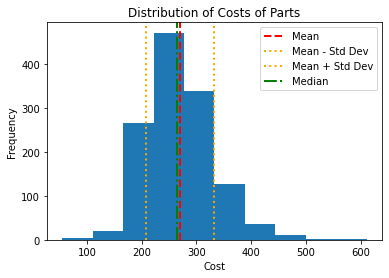

In [11]:
#Illustrate the Mean, Standard Deviation, and Median of the data set.

mean = df_recent_3_years['cost'].mean()
std_dev = df_recent_3_years['cost'].std()
median = df_recent_3_years['cost'].median()


plt.hist(df_recent_3_years['cost'], bins=10)
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Costs of Parts')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean - std_dev, color='orange', linestyle='dotted', linewidth=2, label='Mean - Std Dev')
plt.axvline(mean + std_dev, color='orange', linestyle='dotted', linewidth=2, label='Mean + Std Dev')
plt.axvline(median, color='green', linestyle='dashdot', linewidth=2, label='Median')

plt.legend()
plt.show()


269.2656059421425
(array([   0,    1,    2,    3,    4,   10,   11,   12,   14,   16,   17,
         18,   25,   27,   28,   32,   33,   34,   35,   37,   40,   41,
         43,   45,   46,   47,   48,   49,   50,   51,   52,   55,   56,
         59,   60,   61,   62,   63,   65,   69,   73,   76,   80,   81,
         82,   83,   84,   86,   90,   91,   93,   94,   95,   96,   98,
         99,  101,  102,  103,  105,  106,  114,  117,  118,  120,  121,
        127,  128,  131,  136,  137,  138,  140,  141,  142,  143,  144,
        146,  147,  148,  149,  150,  151,  152,  154,  155,  156,  158,
        162,  163,  164,  165,  166,  167,  170,  176,  178,  179,  180,
        182,  184,  187,  188,  190,  193,  194,  197,  199,  202,  203,
        205,  206,  207,  209,  213,  222,  223,  224,  225,  227,  228,
        230,  232,  233,  234,  235,  236,  239,  240,  244,  246,  248,
        249,  250,  251,  252,  253,  255,  261,  262,  263,  267,  272,
        274,  276,  277,  279,  

<ipython-input-19-f5e748484a50>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent_3_years['zscore'] = zscore(df_recent_3_years['cost'])


,part_id,cost,date,id,repair_description,make,model,year,zscore
4234855,17001001,100.00,2022-06-21 16:40:46,95194050,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,-2.720835
4234860,17001001,100.00,2022-06-17 10:04:28,95144113,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,-2.720835
4572881,17001001,461.70,2022-08-24 14:51:42,96086723,"TIRE, RADIAL LUG TREAD",FORD,F-150,2022-01-01,3.093258
4923449,17001001,69.02,2022-08-16 13:50:57,95968233,"TIRE, RADIAL LUG TREAD",FORD,F-150,2022-01-01,-3.218818
5125386,17001001,610.82,2023-01-17 10:10:32,98081346,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,5.490265
5599338,17001001,443.00,2022-12-19 15:59:32,97709798,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,2.792667
6041662,17001001,448.50,2021-07-27 08:44:55,90239594,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,2.881076
9000544,17001001,461.70,2022-08-25 11:27:36,96098623,"TIRE, RADIAL LUG TREAD",FORD,F-150,2022-01-01,3.093258
9168722,17001001,428.95,2022-10-25 13:37:30,96947095,"TIRE, RADIAL LUG TREAD",FORD,F-150,2022-01-01,2.566823
10651896,17001001,544.36,2023-02-24 12:46:55,98654254,"TIRE, RADIAL LUG TREAD",FORD,F-150,2021-01-01,4.421964


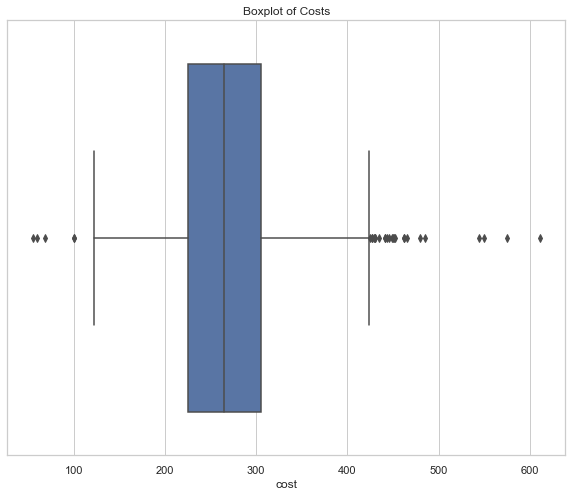

In [19]:
#Identify outliers using a Z-score threshold. 
#Typically, a Z-score above a certain threshold (e.g., 2 or 3) is considered an outlier. Let's assume a threshold of 3:



#Visualize outliers first 

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x='cost', data=df_recent_3_years).set_title('Boxplot of Costs')
print(mean) #matches the graph, validating the results 
# Computing IQR
Q1 = df['cost'].quantile(0.25)
Q3 = df['cost'].quantile(0.75)
outliers_above = print(np.where(df_recent_3_years['cost']>Q3))
outliers_below = print(np.where(df_recent_3_years['cost']<Q1))


#scipy installation is encountering issues but now resolved 
#df_recent_3_years['zscore'] = zscore(df_recent_3_years['cost'])
#outliers = df_recent_3_years[df_recent_3_years['zscore'] > 3]

#I will use interquartile range to determine outliers instead rather than a cut-off of 3 for the z-score
Q1 = df_recent_3_years['cost'].quantile(0.25)
Q3 = df_recent_3_years['cost'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers = df_recent_3_years[(df_recent_3_years['cost'] < lower_threshold) | (df_recent_3_years['cost'] > upper_threshold)]
display(outliers)


In [20]:
#Determine what should be the expected Ford F150 tire repair part price.
print(mean)
print(median)

269.2656059421425
264.97


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df_recent_3_years['year'] = pd.to_numeric(df_recent_3_years['cost'], errors='coerce').astype(float)
df_recent_3_years['date'] = pd.to_numeric(df_recent_3_years['cost'], errors='coerce').astype(float)

X = df_recent_3_years.drop(['cost', 'repair_description', 'make', 'model'], axis=1)  # Features excluding the price column
y = df_recent_3_years['cost']  # Target variable: price

#This step splits the data into a training set (80% of the data) and a testing set (20% of the data) to evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

predicted_prices = model.predict(X_test) #Predict the prices using trained model 
print(predicted_prices)


#If we had a new dataset, we can predict expected price by using new data with the trained model 
#new_data = pd.DataFrame(...)  # Create a new DataFrame with the relevant features
#expected_price = model.predict(new_data)


[430.   202.99 210.   202.   289.   320.   260.88 164.95 252.   246.1
 275.   244.99 313.7  198.   304.37 196.   610.82 264.99 233.   296.98
 209.   290.63 228.27 211.12 306.4  252.   237.03 194.95 265.   325.
 220.99 213.94 223.19 294.95 251.61 338.   285.   302.71 234.   260.
 307.92 345.   221.   198.   229.   320.75 315.   280.   345.   311.97
 252.34 228.   419.   269.98 253.95 544.36 202.99 369.95 287.95 317.32
 200.   100.   276.31 365.   399.6  355.   225.   272.99 239.   296.
 305.8  199.95 174.99 303.99 282.99 575.   280.   367.7  329.   271.
 159.31 181.99 310.79 177.   288.   336.94 298.74 259.14 197.99 348.99
 340.34 217.99 194.12 282.13 290.25 230.   196.   299.   375.43 423.33
 238.6  307.49 207.87 278.34 275.   202.48 253.   310.61 257.6  330.74
 389.   235.   197.   222.   219.95 369.99 177.98 241.55 430.   370.36
 176.99 212.75 214.41 188.83 275.   247.99 224.63 278.   215.   390.
 269.   268.11 359.99 257.99 250.8  226.18 258.   186.1  230.   377.21
 390.   227.95 29

<ipython-input-39-44fb067ce28c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent_3_years['year'] = pd.to_numeric(df_recent_3_years['cost'], errors='coerce').astype(float)
<ipython-input-39-44fb067ce28c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent_3_years['date'] = pd.to_numeric(df_recent_3_years['cost'], errors='coerce').astype(float)
